# Your first deep neural network

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

# pp.35
In p.35, the import method is wrong.

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
x_train[54, 12, 13, 1], y_train[42]

(94, array([2], dtype=uint8))

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

The `to_catgorical` turns integer labels to one-hot-encdoded vectors.
Because the NUM_CLASSES is 10, the vecotrs has length of 10 each.

In [7]:
x_train[54, 12, 13, 1], y_train[42]

(0.36862746, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [8]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

# architecture

## using the Sequential API

**The error of Example 2-1 in p.37 is crazy...**

The input shape: $32\times 32\times 3 = 3072$

The number of parameters (the $1$ is from the bias):

$(3072+1)\times 200 = 614600$

$(200+1)\times 150 = 30150$

$(150+1)\times 10 = 1510$

In [9]:
seq_model = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax')
])
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## using the Functional API

In [10]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [11]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 185us/sample - loss: 1.8540 - accuracy: 0.3329
Epoch 2/10
50000/50000 [==============================] - 9s 174us/sample - loss: 1.6744 - accuracy: 0.4025
Epoch 3/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.5948 - accuracy: 0.4315
Epoch 4/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.5385 - accuracy: 0.4503
Epoch 5/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.5017 - accuracy: 0.4669
Epoch 6/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.4654 - accuracy: 0.4789
Epoch 7/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.4397 - accuracy: 0.4881
Epoch 8/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.4142 - accuracy: 0.4964
Epoch 9/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.3909 - accuracy: 0.5061
Epoch

# analysis

In [13]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.445997204399109, 0.4818]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

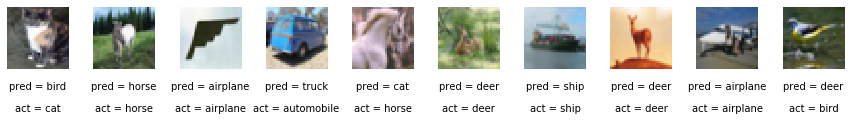

In [16]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
